In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [47]:
X,y = make_blobs(n_samples = 1000, centers =5)
print(X.shape, y.shape)


(1000, 2) (1000,)


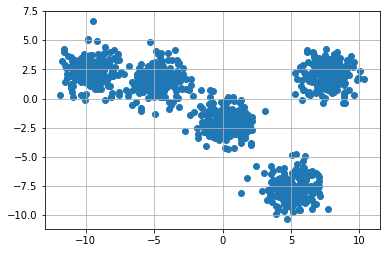

In [48]:
plt.figure(0)
plt.grid("On")
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [42]:
k=5
colors = ['green','red','blue','orange', 'pink']
clusters = {}
for ix in range(k):
    centre = 10.0*(2*np.random.random((X.shape[1],))-1)
    points =[]
    cluster ={
        "centre":centre,
        "points":points,
        "color":colors[ix]
    }
    
    clusters[ix] = cluster
    
print(clusters)   

{0: {'centre': array([-3.07940623, -9.92814143]), 'points': [], 'color': 'green'}, 1: {'centre': array([ 9.47659383, -8.65654405]), 'points': [], 'color': 'red'}, 2: {'centre': array([ 9.65840337, -9.23753165]), 'points': [], 'color': 'blue'}, 3: {'centre': array([-3.02822094, -8.93654159]), 'points': [], 'color': 'orange'}, 4: {'centre': array([-7.21202266, -7.8255435 ]), 'points': [], 'color': 'pink'}}


In [50]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

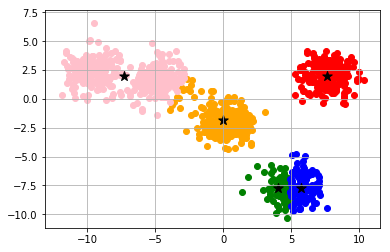

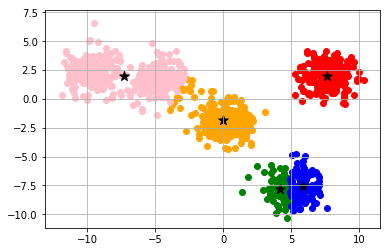

In [61]:
for ix in range(X.shape[0]):
    dist = []
    curr_p = X[ix]
    
    for kx in range(k):
        d = distance(curr_p,clusters[kx]['centre'])
        dist.append(d)
        
    current_cluster = np.argmin(dist)    
    clusters[current_cluster]['points'].append(curr_p)   
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts

plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color='black', s = 100, marker="*")

for kx in range(k):
    if clusters[kx]['coords'].shape[0]>0:
        new_centre = clusters[kx]['coords'].mean(axis=0)
    else:
        new_centre = clusters[kx]['centre']
    
    clusters[kx]['centre'] = new_centre
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], c = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color='black', s = 100, marker="*")